# Assignment 1 - Data Collection and Analysis

## Objective

In this assignment, you as a class will collectively record a dataset with elevator arrival times on the ground floor in CDS.
Using this dataset, you will determine the best location to wait in order to minimize the expected walking distance to the next arriving elevator.

Learning goals:

- Practice collecting, interacting, and visualizing data.
- Practice making a hypothesis based on training data and then evaluating it on test data.

This assignment will be graded on a scale of full credit, partial credit, or no credit. You will get full credit if you collected data, proposed a reasonable location to wait for elevators at, and tested the proposed location on the data to see that it works. The questions are meant to guide you.

## Part 1: Data Collection (9/16 - 9/19)

For this homework, we will collect a dataset with elevator arrival times on the ground floor of CDS as a class.
 - We will use data from Mon 9/16 - Tue 9/17 as training data.
 - We will use data from Wed 9/18 - Thu 9/19 as test data.

To receive credit for this part, you should sign up for a 5 minute slot between 10-5pm on one of your assigned days. The assignment is by first name:
 - If your first name begins with A-N, please sign up for a 5-minute slot on Monday OR Tuesday.
 - If your first name begins with O-Z, please sign up for a 5-minute slot on Wednesday OR Thursday.

You cannot sign up for a slot that has already been taken.
[link to signup sheet](https://docs.google.com/spreadsheets/d/1RhYg51l02JTOEng71JC-4k1oPgTbd25ScAMqvcwDvuU/edit?usp=sharing).

During your assigned time slot, you should observe near the elevators on the ground floor (lobby level) of CDS and
fill in [this Google form](https://docs.google.com/forms/d/e/1FAIpQLSe72Ln_2ZeXiTxfr2r0QI3FLF5wdcXMka_1aZg2RhmQekmXEw/viewform?vc=0&c=0&w=1&flr=0&usp=mail_form_link) with the ID of the elevator when it arrives.
 In other words, when an elevator
door opens, select the elevator ID and submit the form. The timestamp will automatically be recorded. You must be signed in using your BU email to complete the form.

The responses to the Google form are recorded in [this Google spreadsheet](https://docs.google.com/spreadsheets/d/1VepMqIvBq-_oqa1a4RXY7SlLz2GtK4DpJLnBnA7GKOU/edit?usp=sharing), which you all have read access to. You must be signed in using your BU email to access the data.

Please use the following diagram to determine the elevator ID. (units expressed in meters)

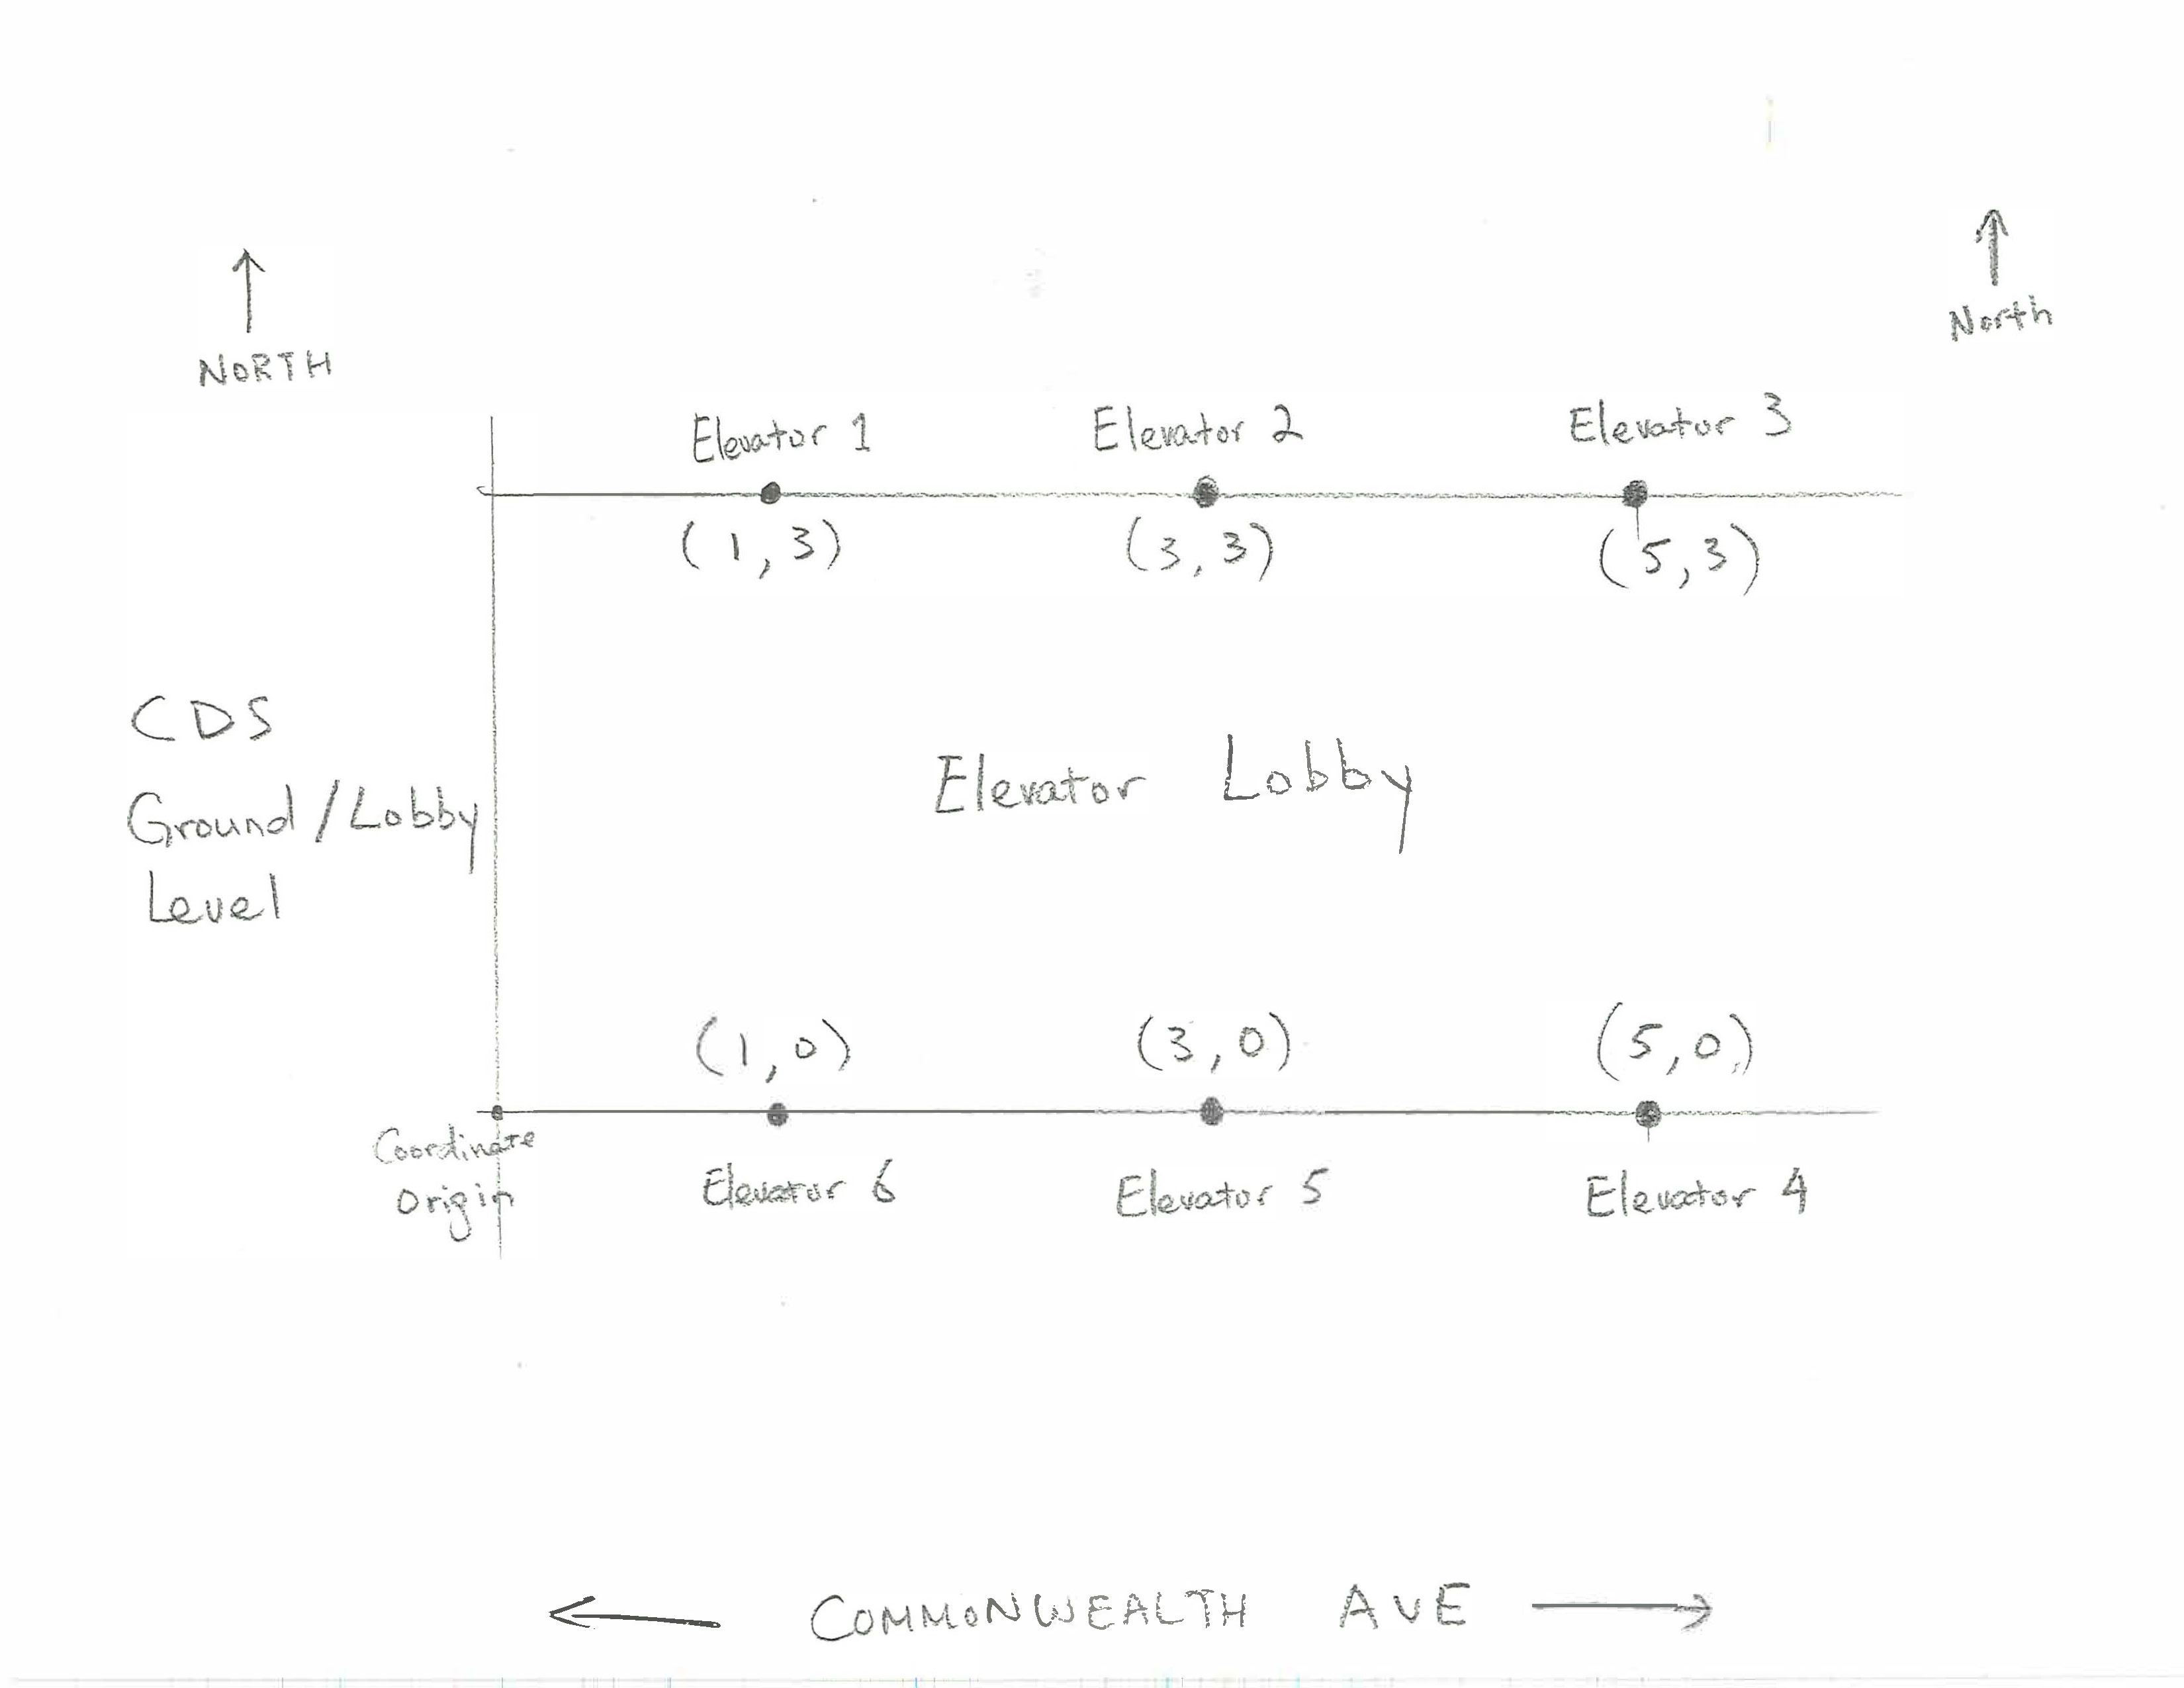

## Part 2: Determining the optimal place to stand

You can start this part after Tuesday 5 pm, when the last training data has been recorded. You are only allowed to use data from Monday 9/16 - Tuesday 9/17 for this part.

Please go to the google spreadsheet linked in the previous part and download the training data as a CSV file. Delete any rows that occur after 9/17. If you are working in Google Colab, you can upload the CSV to the server using the panel on the left.

**Question 1**: According to the diagram of elevator locations above, where should you wait for an elevator to minimize expected
walking distance to the next elevator to arrive, assuming the next elevator to arrive has an equal chance to be any one of the 6 available elevators? Please express your answer using the coordinate system in the diagram. Briefly justify your answer.

**Answer:**  It is most appropriate to wait at the position (3.0, 1.5). The requirement is to determine "where should you wait for an elevator to minimize expected walking distance to the next elevator to arrive," which means finding the point (x, y) that minimizes the sum of distances to the six elevator coordinates. Since the probabilities of the six elevators arriving are the same, their weights are equal. Therefore, we can calculate the Euclidean distances and multiply by the same weight to find the optimal waiting position for the elevator. For this assignment, I only consider a step size of 0.01.

In [1]:
import numpy as np

# Inport the elevator positions
elevator_positions = np.array([
    (1, 3),  
    (3, 3),  
    (5, 3),  
    (5, 0),  
    (3, 0),  
    (1, 0)
])

# Finding the closest coordinates uesing a grid search
x_range = np.arange(1, 5.1, 0.01)
y_range = np.arange(0, 3.1, 0.01)

def Euclidean_distance(x, y):
    distances = np.sqrt((elevator_positions[:, 0] - x)**2 + (elevator_positions[:, 1] - y)**2)
    weighted_distances = np.sum(1/6 * distances)
    return weighted_distances

X, Y = np.meshgrid(x_range, y_range)
Z = np.array([Euclidean_distance(x, y) for x, y in zip(np.ravel(X), np.ravel(Y))])
Z = Z.reshape(X.shape)

min_idx = np.argmin(Z)
best_x, best_y = np.ravel(X)[min_idx], np.ravel(Y)[min_idx]

print(f"The best position is: ({best_x:.2f}, {best_y:.2f})")
print(f"The minimum weighted distance: {Z.min():.2f}")


The best position is: (3.00, 1.50)
The minimum weighted distance: 2.17


**Question 2**: Use a plotting utility (e.g. `matplotlib.pyplot`) to plot the arrival times of elevators on the training data
(Monday 9/16 - Tuesday 9/17). The x-axis should be timestamp and the y-axis should be the elevator ID. I suggest using a scatter plot.
ChatGPT may be useful. Display the plot. List any observations
(e.g. cyclical patterns, some elevators arriving more frequently than others)

In [2]:
import pandas as pd
# Data cleaning
data = pd.read_csv('CDS Elevator Arrivals (Responses) - Form Responses 1.csv')
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%m/%d/%Y %H:%M:%S')

start_date = '2024-09-16'
end_date = '2024-09-17'
start_time = '10:00:00'
end_time = '17:00:00'

# Extracted on September 16th and 17th, between 10:00am and 5:00pm
mask_date_range = (data['Timestamp'] >= start_date) & (data['Timestamp'] < '2024-09-18')
data_filtered = data[mask_date_range]
data_filtered['Time'] = data_filtered['Timestamp'].dt.time
mask_time_range = (data_filtered['Time'] >= pd.to_datetime(start_time).time()) & (data_filtered['Time'] <= pd.to_datetime(end_time).time())
data_filtered = data_filtered[mask_time_range]

# Save it as a training set
data_filtered.drop(columns=['Time'], inplace=True)
data_filtered.to_csv('Training.csv', index=False, date_format='%m/%d/%Y %H:%M:%S')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_31280\578029345.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Time'] = data_filtered['Timestamp'].dt.time


In [3]:
# Read training data
df = pd.read_csv('Training.csv')
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%m/%d/%Y %H:%M:%S')
df['Time'] = df['Timestamp'].dt.time

# Counting the number of arrivals per elevator
elevator_counts = df['Elevator ID'].value_counts()
print(elevator_counts)


Elevator ID
3    168
5    167
4    164
2    161
6    158
1    154
Name: count, dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_31280\275414220.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_9_16['Time'] = [datetime.combine(datetime.today(), t) for t in data_9_16['Time']]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_31280\275414220.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_9_17['Time'] = [datetime.combine(datetime.today(), t) for t in data_9_17['Time']]


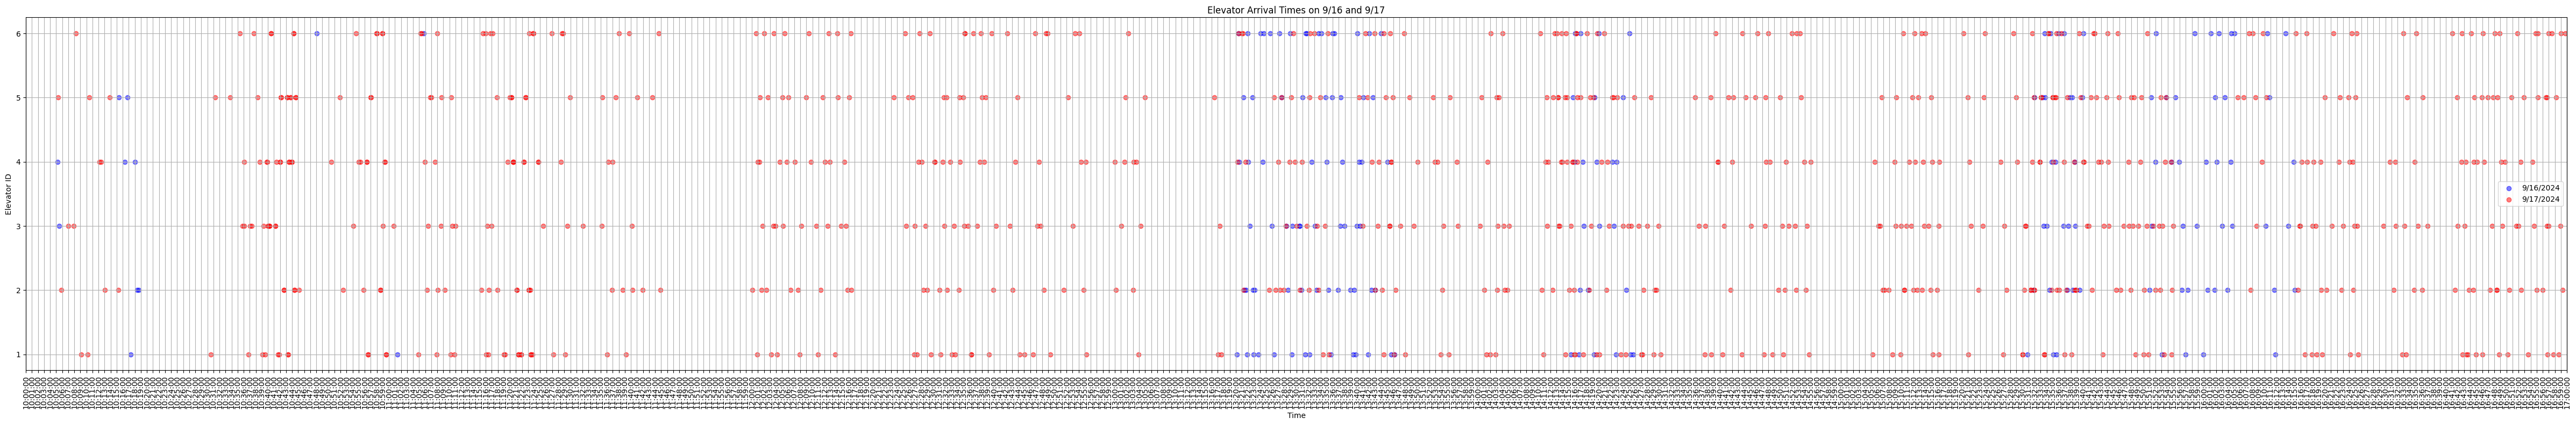

In [4]:
# Code for question 1:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

def make_plot():
    '''
    Read the training data CSV file and plot elevator arrival times for 9/16 and 9/17 on the same plot.
    The X axis shows only the time, and Y axis shows the Elevator ID.
    '''
    # Read training data
    df = pd.read_csv('Training.csv')
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%m/%d/%Y %H:%M:%S')
    df['Time'] = df['Timestamp'].dt.time

    # Filter data for 9/16 and 9/17
    data_9_16 = df[df['Timestamp'].dt.date == pd.to_datetime('2024-09-16').date()]
    data_9_17 = df[df['Timestamp'].dt.date == pd.to_datetime('2024-09-17').date()]
    data_9_16['Time'] = [datetime.combine(datetime.today(), t) for t in data_9_16['Time']]
    data_9_17['Time'] = [datetime.combine(datetime.today(), t) for t in data_9_17['Time']]

    # Create scatter plot
    plt.figure(figsize=(48, 8))
    plt.scatter(data_9_16['Time'], data_9_16['Elevator ID'], alpha=0.5, c='blue', marker='o', label='9/16/2024')
    plt.scatter(data_9_17['Time'], data_9_17['Elevator ID'], alpha=0.5, c='red', marker='o', label='9/17/2024')
    plt.xlabel('Time')
    plt.ylabel('Elevator ID')
    plt.title('Elevator Arrival Times on 9/16 and 9/17')
    plt.legend()
    # Adjusting the timeline
    plt.xlim(datetime.combine(datetime.today(), datetime.strptime('10:00:00', '%H:%M:%S').time()), 
             datetime.combine(datetime.today(), datetime.strptime('17:00:00', '%H:%M:%S').time()))
    plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=1))  
    plt.gca().xaxis.set_minor_locator(mdates.MinuteLocator(interval=1))   
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
    plt.xticks(rotation = 90)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

make_plot()

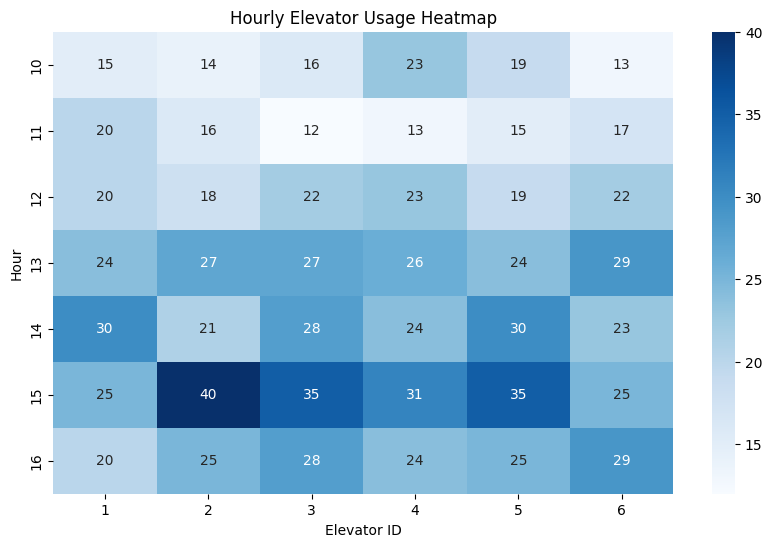

In [5]:
import seaborn as sns
# Creat heat maps based on intra-hourly data
df['Hour'] = df['Timestamp'].dt.hour
heatmap_data = df.groupby(['Hour', 'Elevator ID']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt="d")
plt.title("Hourly Elevator Usage Heatmap")
plt.xlabel("Elevator ID")
plt.ylabel("Hour")
plt.show()

**Answer:** First, due to data limitations, as there are time periods without data, it is difficult to make a comprehensive assessment. The following analysis is based solely on the current data.
Firstly, statistics show that the arrival counts of the six elevators at the first floor are relatively balanced. Secondly, it is challenging to identify any specific peak periods through the scatter plot. This may be due to the CDS building containing not only classrooms but also numerous study rooms and office areas, leading to a consistent demand for elevator usage throughout the day.
However, based on the available data, the heatmap indicates an increase in elevator usage frequency after 1 PM. Analyzing the data from both 16th and 17th, the highest elevator usage frequency occurs around 3 PM.

**Question 3**: Make a table listing the average *frequency*
for each elevator in arrivals per second.
Based on the table you made, do you think it is optimal
to wait in the location you answered for question 1? Explain why or why not. Note that you will need to process the data to take into account
gaps in the data collection. For example, if no one collected data for 1-2pm, you should subtract that from the total time.

In [6]:
from datetime import timedelta

# Filter data for 9/16 and 9/17
data_9_16 = df[df['Timestamp'].dt.date == pd.to_datetime('2024-09-16').date()]
data_9_17 = df[df['Timestamp'].dt.date == pd.to_datetime('2024-09-17').date()]

# Calculate valid data time
time_span_9_16 = (data_9_16['Timestamp'].iloc[-1] - data_9_16['Timestamp'].iloc[0]).total_seconds()
time_span_9_17 = (data_9_17['Timestamp'].iloc[-1] - data_9_17['Timestamp'].iloc[0]).total_seconds()
total_time = time_span_9_16 + time_span_9_17

# Setting the 5-minute threshold
threshold = timedelta(minutes=5)
# Subtract the time for blank data from the total time
last_time = data_9_16['Timestamp'].iloc[0]
for current_time in data_9_16['Timestamp'].iloc[1:]:
    time_diff = current_time - last_time
    if time_diff > threshold:
        total_time -= time_diff.total_seconds()  
    last_time = current_time

last_time = data_9_17['Timestamp'].iloc[0]
for current_time in data_9_17['Timestamp'].iloc[1:]:
    time_diff = current_time - last_time
    if time_diff > threshold:
        total_time -= time_diff.total_seconds()  
    last_time = current_time

print(f"The total time (in seconds) valid for both days is: {total_time} ")

# Counting the number of elevator arrivals per elevator
elevator_counts = df['Elevator ID'].value_counts()
elevator_ids = [1, 2, 3, 4, 5, 6]
result_table = pd.DataFrame(index=['Total data collection time (seconds)', 'Number of arrivals', 'Average frequency (arrivals per second)'], columns=elevator_ids)
for elevator_id in elevator_ids:
    result_table.loc['Total data collection time (seconds)', elevator_id] = total_time
    result_table.loc['Number of arrivals', elevator_id] = elevator_counts.get(elevator_id, 0)
    result_table.loc['Average frequency (arrivals per second)', elevator_id] = elevator_counts.get(elevator_id, 0) / total_time if total_time > 0 else 0
print(result_table)

The total time (in seconds) valid for both days is: 24031.0 
                                                1        2         3  \
Total data collection time (seconds)      24031.0  24031.0   24031.0   
Number of arrivals                            154      161       168   
Average frequency (arrivals per second)  0.006408   0.0067  0.006991   

                                                4         5         6  
Total data collection time (seconds)      24031.0   24031.0   24031.0  
Number of arrivals                            164       167       158  
Average frequency (arrivals per second)  0.006825  0.006949  0.006575  


In [7]:
print(elevator_counts)
# Calculate the probability of arrival of each elevator (based on the number of arrivals)
arrival_probabilities = np.array([elevator_counts.get(elevator_id, 0) / sum(elevator_counts) for elevator_id in elevator_ids])
print(arrival_probabilities)

x_range = np.arange(1, 5.1, 0.01)
y_range = np.arange(0, 3.1, 0.01)

min_weighted_distance = float('inf')
best_position = None

def weighted_distance(x, y, arrival_probabilities):
    distances = np.sqrt((elevator_positions[:, 0] - x)**2 + (elevator_positions[:, 1] - y)**2)
    weighted_distances = np.sum(arrival_probabilities * distances)
    return weighted_distances

X, Y = np.meshgrid(x_range, y_range)
Z = np.array([weighted_distance(x, y, arrival_probabilities) for x, y in zip(np.ravel(X), np.ravel(Y))])
Z = Z.reshape(X.shape)

min_idx = np.argmin(Z)
best_x, best_y = np.ravel(X)[min_idx], np.ravel(Y)[min_idx]

print(f"The best position is: ({best_x:.2f}, {best_y:.2f})")
print(f"The minimum weighted distance: {Z.min():.2f}")


Elevator ID
3    168
5    167
4    164
2    161
6    158
1    154
Name: count, dtype: int64
[0.15843621 0.16563786 0.17283951 0.16872428 0.1718107  0.16255144]
The best position is: (3.05, 1.46)
The minimum weighted distance: 2.16


**Answer:** 

| Elevator ID | 1 | 2 | 3 | 4 | 5 | 6 |
| ----------- | --- |--- |--- |--- |--- |--- |
| Total data collection time (seconds) | 24031 | 24031 | 24031 | 24031 | 24031 |24031 |
| Number of arrivals | 154 | 161 | 168 | 164 | 167 |158 |
| Average frequency (arrivals per second) | 0.006408 | 0.0067 | 0.006991 | 0.006825 | 0.006949 | 0.006575 |

From the numerical results, the answer to the first question is not the optimal solution. However, the actual best waiting point does not differ significantly from the first question's answer. According to the data analysis, the arrival frequencies of the six elevators at the first floor are similar. I calculated the actual arrival probabilities for each elevator by dividing the number of arrivals by the total arrivals.
The results indicate that the third and fifth elevators have slightly higher frequencies. Therefore, the optimal waiting point is adjusted to be slightly closer to these two elevators, resulting in a minor difference from the answer provided in the first question.

**Question 4** : Let's say I just arrived in the lobby and have no prior knowledge (e.g. which floor the elevators are currently on or which elevator was the last to arrive).
Using the results from question 3, determine the probability of each elevator being the next to arrive. Present these probabilities in a table and ensure they sum to one. Provide an intuitive explanation to support your answer.

In [8]:
# Calculate the probability of arrival of each elevator (based on the frequency of arrivals)
frequencies = []
for elevator_id in elevator_ids:
    frequency = elevator_counts.get(elevator_id, 0) / total_time if total_time > 0 else 0
    frequencies.append(frequency)

probabilities = frequencies / np.sum(frequencies)
result_table.loc['Arrival probability'] = probabilities
print(result_table)

                                                1         2         3  \
Total data collection time (seconds)      24031.0   24031.0   24031.0   
Number of arrivals                            154       161       168   
Average frequency (arrivals per second)  0.006408    0.0067  0.006991   
Arrival probability                      0.158436  0.165638   0.17284   

                                                4         5         6  
Total data collection time (seconds)      24031.0   24031.0   24031.0  
Number of arrivals                            164       167       158  
Average frequency (arrivals per second)  0.006825  0.006949  0.006575  
Arrival probability                      0.168724  0.171811  0.162551  


**Answer:** 

| Elevator ID | 1 | 2 | 3 | 4 | 5 | 6 |
| ----------- | --- |--- |--- |--- |--- |--- |
| Probability of being next elevator to arrive | 0.158436 | 0.165638 | 0.17284 | 0.168724 | 0.171811 | 0.162551 |

Without prior knowledge, the results from Question 3 allow us to determine probabilities based on elevator arrival counts as well as arrival frequencies. A higher frequency indicates that the elevator arrives more times within the same period, meaning that when I just enter the lobby, the probability of that elevator arriving is greater.
Since the arrival counts have already been used to calculate probabilities in Question 3, in Question 4, I will use elevator arrival frequencies to determine probabilities. To ensure that the total probability sums to 1, I will normalize the frequencies into probabilities. The calculation method involves dividing each elevator's frequency by the total frequency.
The results are consistent with those from Question 3. From the calculations, it can be seen that Elevator 3 has the highest arrival probability at 0.17284, while Elevator 1 has the lowest at 0.158436.

**Question 5**: Calculate the optimal location to wait for an elevator based on your answer to the previous question. Give your answer as a coordinate
using the coordinate system of the diagram at the beginning of this assignment. Justify your answer briefly.


In [9]:
# Finding the best coordinates (based on the frequency of arrivals)
arrival_probabilities = frequencies / np.sum(frequencies)

x_range = np.arange(1, 5.1, 0.01)
y_range = np.arange(0, 3.1, 0.01)
min_weighted_distance = float('inf')
best_position = None

def weighted_distance(x, y, arrival_probabilities):
    distances = np.sqrt((elevator_positions[:, 0] - x)**2 + (elevator_positions[:, 1] - y)**2)
    weighted_distances = np.sum(arrival_probabilities * distances)
    return weighted_distances

X, Y = np.meshgrid(x_range, y_range)
Z = np.array([weighted_distance(x, y, arrival_probabilities) for x, y in zip(np.ravel(X), np.ravel(Y))])
Z = Z.reshape(X.shape)

min_idx = np.argmin(Z)
best_x, best_y = np.ravel(X)[min_idx], np.ravel(Y)[min_idx]

print(f"The best position is: ({best_x:.2f}, {best_y:.2f})")
print(f"The minimum weighted distance: {Z.min():.2f}")


The best position is: (3.05, 1.46)
The minimum weighted distance: 2.16


**Answer:** The optimal waiting position for the elevator is (3.05, 1.46). Based on the results from the previous question, the arrival probabilities for the third and fifth elevators are slightly higher, which leads to the waiting point being adjusted slightly closer to the coordinates of these two elevators. This question confirms that the results from using frequencies to calculate probabilities are consistent with the results obtained from calculating probabilities based on arrival counts in Question 3.

**Question 6**: On the training data, calculate the average distance traveled to the next elevator arrival if I wait at the location specified in question 1.
Then, calculate the average distance traveled if I wait at the location specified in question 5.

*Your answer to question 5 should result in a shorter average distance traveled.*

You are free to write your own code for these calculations, but we recommend implementing a function called `get_average_walk_distance(data, coordinate)`, since you will need to reuse this function.

In [10]:
# Finding the best coordinates (based on the number of arrivals)
def get_average_walk_distance(data, coordinate):
    '''
    data is a csv file containing the data.
    coordinate is the coordinate to wait at.
    '''
    x, y = coordinate  
    elevator_counts = data['Elevator ID'].value_counts()  
    total_arrivals = elevator_counts.sum()  
    arrival_probabilities = np.array([elevator_counts.get(i, 0) / total_arrivals for i in range(1, 7)])
    
    distances = np.sqrt((elevator_positions[:, 0] - x)**2 + (elevator_positions[:, 1] - y)**2)
    average_walk_distance = np.sum(arrival_probabilities * distances)

    return average_walk_distance

# Position designated in question 1
position_q1 = (3, 1.5)
average_distance_q1 = get_average_walk_distance(df, position_q1)
print(f"Mean distance while waiting at position {position_q1} of problem 1: {average_distance_q1}")

# Position designated in question 5
position_q5 = (3.05, 1.46)  
average_distance_q5 = get_average_walk_distance(df, position_q5)
print(f"Mean distance while waiting at position {position_q5} of problem 5: {average_distance_q5}")
print("The position of the fifth question shortens the distance:", average_distance_q1 - average_distance_q5)

Mean distance while waiting at position (3, 1.5) of problem 1: 2.162551440329218
Mean distance while waiting at position (3.05, 1.46) of problem 5: 2.1620210796679444
The position of the fifth question shortens the distance: 0.0005303606612736544


## Part 3: Testing on evaluation data

You can start this part after Thursday 5 pm, when the last test data has been recorded.

Please go to the google spreadsheet linked in part 1 and download the data as a CSV file. Delete any rows that occurred before 9/18, since we used this for training already. If you are working in Google Colab, you can upload the CSV to the server using the panel on the left.

Use the `get_average_walk_distance` function you wrote for Part 2 Question 6 to calculate the average distance traveled to the next elevator arrival on the test data for both the coordinate specified in question 1 and the coordinate specified in question 5. Then, organize the numbers using the following table:

|Average Distance Walked (m) | Training Data | Test Data |
|----------------------------|---------------|-----------|
|Naive position (Question 1) | 2.162551440329218 |   2.162122687439143 |
|Smart position (Question 5) | 2.1620210796679444 |   2.1622203066106747 |

Did you succeed in finding a good location to wait for the elevators? If not, explain what might have gone wrong.

**Answer:** I did not successfully find a good waiting position for the elevator. The results from testing show that the average distance from the optimized position in the training set to the six elevators is 0.0000976 m greater than that from the unoptimized position. After analyzing the test set data, I found that the arrival probabilities of Elevator 3 and Elevator 2 are the highest, whereas in the training set, the highest arrival probabilities are for Elevator 3 and Elevator 5. Additionally, Elevators 2 and 5 are positioned symmetrically around the center point.
As a result, the optimal point in the training set shifted 0.04 m towards Elevator 5 from the center point. Compared to the point identified in Question 1, this adjustment caused the best point in the training set to be farther from Elevator 2, which has the second highest arrival probability in the test set. Therefore, I did not find the optimal waiting position through the training set. Based on data estimation, the best point in the test set should be above (3.0, 1.5).

In [13]:
# Select test set
data = pd.read_csv('CDS Elevator Arrivals (Responses) - Form Responses 1.csv')
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%m/%d/%Y %H:%M:%S')

start_date = '2024-09-18'
end_date = '2024-09-19'
start_time = '10:00:00'
end_time = '17:00:00'

mask_date_range = (data['Timestamp'] >= start_date) & (data['Timestamp'] < '2024-09-20')
data_filtered = data[mask_date_range]

data_filtered['Time'] = data_filtered['Timestamp'].dt.time
mask_time_range = (data_filtered['Time'] >= pd.to_datetime(start_time).time()) & (data_filtered['Time'] <= pd.to_datetime(end_time).time())
data_test = data_filtered[mask_time_range]

# Position designated in question 1
position_q1 = (3, 1.5)
average_distance_q1 = get_average_walk_distance(data_test, position_q1)
print(f"Mean distance while waiting at position {position_q1} of problem 1:  {average_distance_q1}")

# Position designated in question 5
position_q5 = (3.05, 1.46)  
average_distance_q5 = get_average_walk_distance(data_test, position_q5)
print(f"Mean distance while waiting at position {position_q5} of problem 5: {average_distance_q5}")
print("The position of the fifth question shortens the distance:{:.19f}".format(average_distance_q1 - average_distance_q5))

Mean distance while waiting at position (3, 1.5) of problem 1:  2.162122687439143
Mean distance while waiting at position (3.05, 1.46) of problem 5: 2.1622203066106747
The position of the fifth question shortens the distance:-0.0000976191715316155


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_31280\3627091801.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Time'] = data_filtered['Timestamp'].dt.time


In [12]:
# Checking test set data
elevator_counts = data_test['Elevator ID'].value_counts()  
total_arrivals = elevator_counts.sum()  
arrival_probabilities = np.array([elevator_counts.get(i, 0) / total_arrivals for i in range(1, 7)])
print(elevator_counts)
print(arrival_probabilities)

Elevator ID
3    180
2    176
5    171
4    170
6    167
1    163
Name: count, dtype: int64
[0.1587147  0.17137293 0.17526777 0.16553067 0.16650438 0.16260954]
